In [ ]:
from google.colab import files
files.upload()


Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"frankprojects","key":"5992957087b7561e4a8094909f1a1b89"}'}

In [ ]:
!ls -lha kaggle.json



-rw-r--r-- 1 root root 69 Jun  8 13:35 kaggle.json


In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!pwd


/content


In [ ]:
!kaggle datasets list


ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          27942        784  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                               6KB  2023-05-28 18:26:48           2123         59  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           4625         94  1.0              
mohithsairamreddy/salary-data 

In [ ]:
!kaggle datasets download -d grassknoted/asl-alphabet


100% 1.02G/1.03G [00:50<00:00, 22.6MB/s]
100% 1.03G/1.03G [00:50<00:00, 21.7MB/s]


In [ ]:
!unzip /content/asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

In [ ]:
!kaggle datasets download -d kareem3egm/cucumber-plant-diseases-dataset


100% 758M/760M [00:47<00:00, 20.0MB/s]
100% 760M/760M [00:47<00:00, 16.9MB/s]


In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.70G/2.70G [02:08<00:00, 22.8MB/s]
100% 2.70G/2.70G [02:08<00:00, 22.6MB/s]


In [ ]:
!kaggle datasets download -d alyeko/potato-tomato-dataset
!kaggle kernels pull utkarshsaxenadn/tomato-leaves-disease-classification-cct-acc-98
!kaggle kernels pull abdallahwagih/effecientnetb3-tomato-disease-detection-99-81

100% 228M/229M [00:13<00:00, 17.3MB/s]
100% 229M/229M [00:13<00:00, 17.5MB/s]
Source code downloaded to /content/tomato-leaves-disease-classification-cct-acc-98.ipynb
Source code downloaded to /content/effecientnetb3-tomato-disease-detection-99-81.ipynb


In [ ]:
!kaggle kernels pull alyeko/1-potato-and-tomato-blight-disease-classification

Source code downloaded to /content/1-potato-and-tomato-blight-disease-classification.ipynb


In [ ]:
!unzip /content/potato-tomato-dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: idata/Image Dataset/ImageDataset/train/tomato_healthy/tomato_healthy_1700_gblr_3.JPG  
  inflating: idata/Image Dataset/ImageDataset/train/tomato_healthy/tomato_healthy_1700_gblr_4.JPG  
  inflating: idata/Image Dataset/ImageDataset/train/tomato_healthy/tomato_healthy_1700_rrot_1.JPG  
  inflating: idata/Image Dataset/ImageDataset/train/tomato_healthy/tomato_healthy_1701_ccrp_1.JPG  
  inflating: idata/Image Dataset/ImageDataset/train/tomato_healthy/tomato_healthy_1701_ccrp_2.JPG  
  inflating: idata/Image Dataset/ImageDataset/train/tomato_healthy/tomato_healthy_1701_ccrp_3.JPG  
  inflating: idata/Image Dataset/ImageDataset/train/tomato_healthy/tomato_healthy_1701_ccrp_4.JPG  
  inflating: idata/Image Dataset/ImageDataset/train/tomato_healthy/tomato_healthy_1701_gblr_1.JPG  
  inflating: idata/Image Dataset/ImageDataset/train/tomato_healthy/tomato_healthy_1701_gblr_2.JPG  
  inflating: idata/Image Dataset/ImageDataset/tra

Importing neccesary files

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import AveragePooling2D, Dropout, Input, BatchNormalization, Dense
import numpy as np
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from keras import models
from PIL import ImageFile
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
import urllib.request
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
  print("Found GPU at: {}".format(device_name))
else:
  device_name = "/device:CPU:0"
  print("No GPU, using {}.".format(device_name))
print('files loaded')


instantiation constants and paths

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)
NUM_CLASSES = 28
image_path ='/content/asl_alphabet_train/asl_alphabet_train'
train_path ='/content/asl_alphabet_train/asl_alphabet_train'
validate_path='/content/asl_alphabet_train/asl_alphabet_train'

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import AveragePooling2D, Dropout, Input, BatchNormalization, Dense
import numpy as np
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from keras import models
from PIL import ImageFile
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
import urllib.request
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
  print("Found GPU at: {}".format(device_name))
else:
  device_name = "/device:CPU:0"
  print("No GPU, using {}.".format(device_name))
print('files loaded')


show images

In [ ]:
!cp /content/asl_alphabet_train/asl_alphabet_train

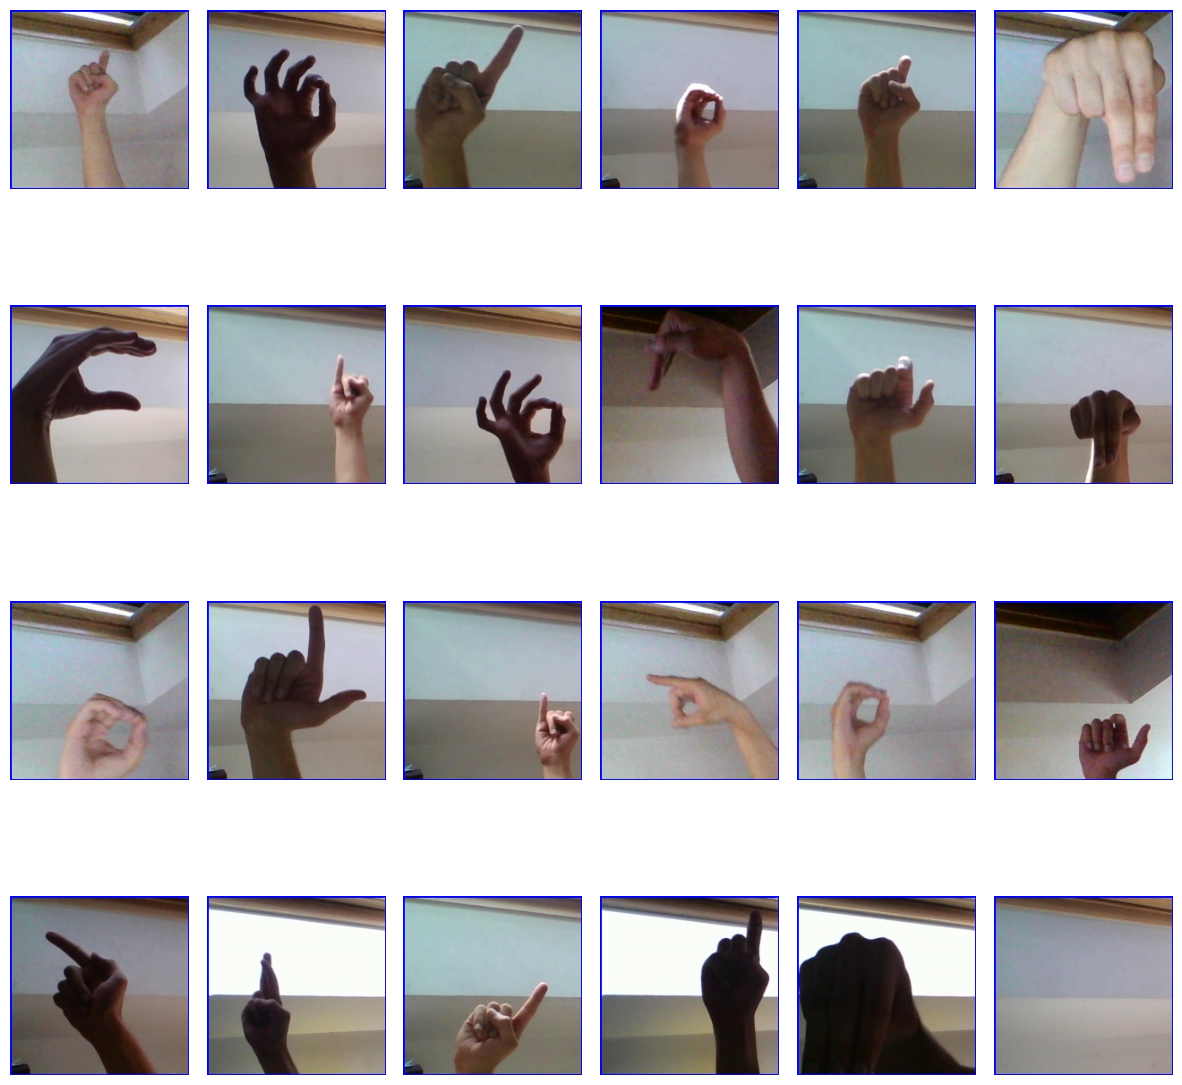

In [ ]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for i in range(24):
    random_folder=np.random.randint(0,len(os.listdir(image_path)))
    random_folder_path=os.path.join(image_path,os.listdir(image_path)[random_folder])
    random_image=np.random.randint(0,len(os.listdir(random_folder_path)))
    random_image_path=os.path.join(random_folder_path,os.listdir(random_folder_path)[random_image])
    image=cv2.imread(random_image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.subplot(4,6,i+1)
    plt.imshow(image)
    plt.axis("off")
plt.show()

In [ ]:
class_names = os.listdir(image_path)
NUM_CLASSES=class_names
print(len(class_names))
print(class_names)


29
['W', 'E', 'P', 'Q', 'D', 'O', 'X', 'A', 'K', 'F', 'U', 'G', 'Y', 'space', 'C', 'T', 'nothing', 'V', 'R', 'Z', 'M', 'L', 'I', 'H', 'N', 'J', 'B', 'del', 'S']


Getting class details

In [ ]:
number_of_images = {}
for class_name in class_names:
    number_of_images[class_name] = len(os.listdir(image_path+"/"+class_name))

images_each_class = pd.DataFrame(list(number_of_images.items()), columns=['Class Name', 'Number of Images'])

In [ ]:
images_each_class

,Class Name,Number of Images
0,W,3000
1,E,3000
2,P,3000
3,Q,3000
4,D,3000
5,O,3000
6,X,3000
7,A,3000
8,K,3000
9,F,3000


Start training

In [ ]:
traindata_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,
                                                                    shear_range=0.2, horizontal_flip=True,validation_split=0.2,fill_mode='nearest')

validdata_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testdata_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_generator=traindata_generator.flow_from_directory(train_path,batch_size=BATCH_SIZE,class_mode="categorical",
                                                           target_size=(32,32),color_mode="rgb",shuffle=True )

Found 87000 images belonging to 29 classes.


In [ ]:
valid_data_generator=validdata_generator.flow_from_directory(train_path,batch_size=BATCH_SIZE,class_mode="categorical",
                                                           target_size=(32,32),color_mode="rgb",shuffle=True)

Found 87000 images belonging to 29 classes.


In [ ]:
test_data_generator=testdata_generator.flow_from_directory(validate_path,batch_size=BATCH_SIZE,class_mode="categorical",
                                                           target_size=(32,32),color_mode="rgb",shuffle=False )

Found 87000 images belonging to 29 classes.


In [ ]:
class_dict = train_data_generator.class_indices
class_list = list(class_dict.keys())
class_list

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'del',
 'nothing',
 'space']

In [ ]:
class_dict = test_data_generator.class_indices
class_list = list(class_dict.keys())
class_list

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'del',
 'nothing',
 'space']

Build the model

In [ ]:
mobilenetV2_model= tf.keras.applications.MobileNetV2(weights='imagenet',classes=11,include_top=False, input_shape=(32,32, 3))
x= mobilenetV2_model.output
x= GlobalAveragePooling2D()(x)
x= Dense(1024,activation='relu')(x)
x= Dense(512,activation='relu')(x)
x= BatchNormalization()(x)
x= Dropout(0.2)(x)
prediction= Dense(11, activation = 'softmax')(x)
with tf.device(device_name):
  model= Model(inputs= mobilenetV2_model.input, outputs= prediction)

  model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
  model.summary()

  model.summary()

9406464/9406464 [==============================] - 2s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 16, 16, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 16, 16, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 16, 16, 32)   0           ['bn_Conv1[0][0]']               
                               

Start training using the mobilenetV2 model

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='max', verbose=1, patience=50,baseline=0.4,min_delta=0.0001,restore_best_weights=False)

history= model.fit(train_data_generator,
                   steps_per_epoch=BATCH_SIZE,
                   validation_data= valid_data_generator,
                   validation_steps= BATCH_SIZE,
                   shuffle=True,

                   epochs =100,
                   batch_size = 32,callbacks=[callback])

Summarize training data

In [ ]:
plt.figure(figsize=(10,10))
plt.style.use("dark_background")
plt.plot(history.history['accuracy'],marker="*",linestyle="--",color="yellow",markersize=10,lw=4)
plt.plot(history.history['val_accuracy'],marker="D",linestyle="-.",color="darkcyan",markersize=10,lw=4)
plt.title('Model Accuracy\n',color="lavender",fontsize=20)
plt.ylabel('Accuracy',color="lavender",fontsize=15)
plt.xlabel('Epoch',color="lavender",fontsize=15)
plt.legend(['Train_Accuracy', 'Test_accuracy'], loc='upper left')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.style.use("dark_background")
plt.plot(history.history['loss'],marker="v",linestyle="--",color="wheat",markersize=10,lw=4)
plt.plot(history.history['val_loss'],marker="X",linestyle="-.",color="turquoise",markersize=10,lw=4)
plt.title('Model Loss\n',color="snow",fontsize=20)
plt.ylabel('Loss',color="snow",fontsize=15)
plt.xlabel('Epoch',color="snow",fontsize=15)
plt.legend(['Train_Loss', 'Test_Loss'], loc='upper left')
plt.show()

Save model

In [ ]:
model.save('my_model.h5')
model = models.load_model('my_model.h5')

Metrics

In [ ]:
pred=model.predict(test_data_generator,steps=32)
final_predict=np.argmax(pred,axis=1)
true_data=test_data_generator.classes

In [ ]:
print("Accuracy Score is",accuracy_score(true_data,final_predict))

In [ ]:
print("ROC AUC Score is {}".format(roc_auc_score(true_data, pred,multi_class='ovr')))

In [ ]:
plt.figure(figsize=(10,10))
plt.style.use('Solarize_Light2')
# Compute the F1 score for each threshold value
y_pred = model.predict(test_data_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true=test_data_generator.classes
f1_scores = []
thresholds = np.arange(0.1, 1.0, 0.1)
for threshold in thresholds:
    y_pred_threshold = (y_pred >= threshold).astype(int)
    f1_scores.append(f1_score(y_true, y_pred_threshold, average='macro'))

# Plot the F1 score curve
plt.plot(thresholds, f1_scores,color="navy",marker="*",linestyle="--",linewidth=3)
plt.xlabel('Threshold',color="black",fontsize=15)
plt.ylabel('F1 Score',color="black",fontsize=15)
plt.title('F1 Score Curve\n',fontsize=20,color="black")
plt.show()

In [ ]:
# Evaluate the model on the test data
test_steps = BATCH_SIZE
y_pred = model.predict(test_data_generator,test_steps)

# Compute the one-hot encoded class labels
y_true_onehot = tf.keras.utils.to_categorical(y_true)

# Compute the micro-averaged ROC curve and AUC score
fpr_micro, tpr_micro, thresholds_micro = roc_curve(y_true_onehot.ravel(), y_pred.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)


# Plot the micro-averaged ROC curve
plt.figure(figsize=(10,10))
plt.style.use("seaborn-darkgrid")
plt.plot(fpr_micro, tpr_micro, color='darkgreen', lw=2,marker="H",markersize=10, label='micro-average ROC curve (AUC = %0.2f)' % roc_auc_micro)
plt.plot([0, 1], [0, 1], color='purple', lw=4,marker="P")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',color="black",fontsize=15)
plt.ylabel('True Positive Rate',color="black",fontsize=15)
plt.title('Receiver Operating Characteristic (Micro-Averaged)\n',color="black",fontsize=20)
plt.legend(loc="lower right")
plt.show()


In [ ]:
num_classes=11
colors = ["red", "darkorange", "navy", "purple", "azure", "yellow", "gold", "coral", "cornflowerblue",           "crimson", "cyan", "darkcyan", "darkgoldenrod", "darkgray", "darkgreen", "darkkhaki",           "darkmagenta", "darkolivegreen", "darkorchid", "darksalmon", "darkseagreen", "darkslateblue",           "darkslategray", "darkturquoise", "deeppink", "deepskyblue", "dodgerblue", "forestgreen",           "hotpink", "indianred", "indigo", "lawngreen", "lime", "limegreen", "maroon", "mediumblue",           "mediumorchid", "mediumseagreen"]

fpr_macro = dict()
tpr_macro = dict()
roc_auc_macro = dict()
for i in range(num_classes):
    fpr_macro[i], tpr_macro[i], _ = roc_curve(y_true_onehot[:, i], y_pred[:, i])
    roc_auc_macro[i] = auc(fpr_macro[i], tpr_macro[i])

# Compute the macro-average of the ROC curve and AUC score
fpr_macro["avg"], tpr_macro["avg"], _ = roc_curve(y_true_onehot.ravel(), y_pred.ravel())
roc_auc_macro["avg"] = auc(fpr_macro["avg"], tpr_macro["avg"])


# Plot the macro-averaged ROC curve
plt.figure(figsize=(20,20))
plt.style.use("seaborn-dark-palette")
plt.plot(fpr_macro["avg"], tpr_macro["avg"], color='darkorange', lw=2, label='macro-average ROC curve (AUC = %0.2f)' % roc_auc_macro["avg"])
for i in range(num_classes):
    plt.plot(fpr_macro[i], tpr_macro[i], label='ROC curve of class %d (AUC = %0.2f)' % (i, roc_auc_macro[i]),color=colors[i],lw=5,marker="*")

plt.plot([0, 1], [0, 1], color='darkorange',marker="o",lw=5,markersize=10)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',color="black",fontsize=15)
plt.ylabel('True Positive Rate',color="black",fontsize=15)
plt.title('Receiver operating characteristic (macro-averaged)\n',color="black",fontsize=20)
plt.legend(loc="best")
plt.show()

In [ ]:
plt.figure(figsize=(40,40))
cm= confusion_matrix(test_data_generator.classes,final_predict)
sns.heatmap(cm,  annot=True ,fmt="d",cmap="Oranges",xticklabels=class_names,
            yticklabels=class_names,linewidth=4)
plt.title("Confusion_matrix\n",fontsize=20,color="black")
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [ ]:
print(classification_report(test_data_generator.classes, final_predict,target_names=class_list))

In [ ]:
class_name = list(test_data_generator.class_indices.keys())

plt.figure(figsize=(30,30))
number_images=(5,5)
for i in range(1,(number_images[0]*number_images[1])+1):
    plt.subplot(number_images[0],number_images[1],i)
    plt.axis("off")

    true_label = class_name[test_data_generator.classes[i]]
    predicted_label = class_name[final_predict[i]]

    color="green"
    if true_label != predicted_label:
        color="red"

    plt.title(f"True: {true_label}\nPredicted: {predicted_label}", color=color)
    plt.imshow(plt.imread(test_data_generator.filepaths[i]))
plt.show()

In [ ]:
predict_test_data=testdata_generator.flow_from_directory(test_path,batch_size=batch_size,class_mode="categorical",
                                                           target_size=(224,224),color_mode="rgb",shuffle=False )

In [ ]:
len(class_names)

Predict custom data